In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

# Read in data set

In [14]:
df = pd.read_csv('model_Data.csv')
df

/Users/joelreji/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,duration_Secs,path,fragmented_Path,click_Path,click_Count,back_Click,back_click_Count,completed_Path,target,source,...,none,Avg_outDegree,Avg_linkTraversals,detourness,RMDFR,connection_ratio,shortest_path,relative_backtracking,clickstream_compactness,current_distance_to_target
0,166,14th_century;15th_century;16th_century;Pacific...,"['14th_century', '15th_century', '16th_century...","['14th_century', '15th_century', '16th_century...",9,0,0,1,African_slave_trade,14th_century,...,0,66.500000,1.0,0.6666666666666666,0.833333,0.428571,4,0.0,0.861111,4
1,88,14th_century;Europe;Africa;Atlantic_slave_trad...,"['14th_century', 'Europe']","['14th_century', 'Europe', 'Africa', 'Atlantic...",5,0,0,1,African_slave_trade,14th_century,...,0,95.000000,1.0,1.0,1.000000,1.000000,4,0.0,0.500000,4
2,138,14th_century;Niger;Nigeria;British_Empire;Slav...,"['14th_century', 'Niger', 'Nigeria', 'British_...","['14th_century', 'Niger', 'Nigeria', 'British_...",8,0,0,1,African_slave_trade,14th_century,...,0,74.600000,1.0,0.5,0.875000,0.571429,4,0.0,0.825000,3
3,37,14th_century;Renaissance;Ancient_Greece;Greece,"['14th_century', 'Renaissance', 'Ancient_Greece']","['14th_century', 'Renaissance', 'Ancient_Greec...",4,0,0,1,Greece,14th_century,...,0,53.000000,1.0,1.0,0.750000,0.500000,3,0.0,0.833333,2
4,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,"['14th_century', 'Italy', 'Roman_Catholic_Chur...","['14th_century', 'Italy', 'Roman_Catholic_Chur...",7,0,0,1,John_F._Kennedy,14th_century,...,0,55.200000,1.0,0.75,0.750000,0.800000,4,0.0,0.787500,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91503,30,Beach;Geology;Science;Mathematics,"['Beach', 'Geology', 'Science']","['Beach', 'Geology', 'Science', 'Mathematics']",4,0,0,0,African_Union,Beach,...,0,31.666667,1.0,1.0,0.750000,1.000000,4,0.0,0.500000,4
91504,1949,FIFA_World_Cup;Spain;Tourism;The_Ashes,"['FIFA_World_Cup', 'Spain', 'Tourism']","['FIFA_World_Cup', 'Spain', 'Tourism', 'The_As...",4,0,0,0,A_cappella,FIFA_World_Cup,...,0,64.333333,1.0,1.0,0.750000,0.500000,4,0.0,0.833333,4
91505,112,Julius_Caesar;Roman_mythology;1st_century_BC;1...,"['Julius_Caesar', 'Roman_mythology', '1st_cent...","['Julius_Caesar', 'Roman_mythology', '1st_cent...",7,1,1,0,1980_eruption_of_Mount_St._Helens,Julius_Caesar,...,0,64.800000,1.0,0.5,0.875000,0.444444,4,0.0,0.837500,4
91506,1838,Asteroid;Trojan_War,['Asteroid'],"['Asteroid', 'Trojan_War']",2,0,0,0,Viking,Asteroid,...,0,19.000000,0.0,err,0.000000,0.000000,4,0.0,0.000000,4


# Dropping all columns that wouldn't be available at the beginning

In [15]:
df = df.drop(['fragmented_Path', 'first_Category', 'path','click_Path', 'target', 'source', 'back_Click', 'back_click_Count', 'click_Count' ], axis=1)
df = df.drop(['duration_Secs'], axis=1)
df['Avg_outDegree'] = pd.to_numeric(df['Avg_outDegree'],errors = 'coerce')
df['Avg_linkTraversals'] = pd.to_numeric(df['Avg_linkTraversals'],errors = 'coerce')
df['detourness'] = pd.to_numeric(df['detourness'],errors = 'coerce')
df['RMDFR'] = pd.to_numeric(df['RMDFR'],errors = 'coerce')
df['connection_ratio'] = pd.to_numeric(df['connection_ratio'],errors = 'coerce')
df['shortest_path'] = pd.to_numeric(df['shortest_path'],errors = 'coerce')
df['relative_backtracking'] = pd.to_numeric(df['relative_backtracking'],errors = 'coerce')
df['clickstream_compactness'] = pd.to_numeric(df['clickstream_compactness'],errors = 'coerce')
df['current_distance_to_target'] = pd.to_numeric(df['current_distance_to_target'],errors = 'coerce')
df = df.dropna()
df

,completed_Path,Art,Business_Studies,Citizenship,Countries,Design_and_Technology,Everyday_life,Geography,History,IT,...,none,Avg_outDegree,Avg_linkTraversals,detourness,RMDFR,connection_ratio,shortest_path,relative_backtracking,clickstream_compactness,current_distance_to_target
0,1,0,0,0,0,0,0,0,1,0,...,0,66.500000,1.0,0.666667,0.833333,0.428571,4.0,0.0,0.861111,4.0
1,1,0,0,0,0,0,0,1,0,0,...,0,95.000000,1.0,1.000000,1.000000,1.000000,4.0,0.0,0.500000,4.0
2,1,0,0,0,0,0,0,1,0,0,...,0,74.600000,1.0,0.500000,0.875000,0.571429,4.0,0.0,0.825000,3.0
3,1,0,0,0,0,0,0,0,1,0,...,0,53.000000,1.0,1.000000,0.750000,0.500000,3.0,0.0,0.833333,2.0
4,1,0,0,0,1,0,0,0,0,0,...,0,55.200000,1.0,0.750000,0.750000,0.800000,4.0,0.0,0.787500,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91498,0,0,0,0,0,0,0,0,1,0,...,0,28.200000,1.0,0.500000,0.666667,1.000000,4.0,0.0,0.687500,4.0
91501,0,0,0,0,1,0,0,0,0,0,...,0,41.200000,1.0,0.750000,0.666667,0.666667,4.0,0.0,0.750000,4.0
91503,0,0,0,0,0,0,0,1,0,0,...,0,31.666667,1.0,1.000000,0.750000,1.000000,4.0,0.0,0.500000,4.0
91504,0,0,0,0,1,0,0,0,0,0,...,0,64.333333,1.0,1.000000,0.750000,0.500000,4.0,0.0,0.833333,4.0


In [16]:
df.dtypes

completed_Path                  int64
Art                             int64
Business_Studies                int64
Citizenship                     int64
Countries                       int64
Design_and_Technology           int64
Everyday_life                   int64
Geography                       int64
History                         int64
IT                              int64
Language_and_literature         int64
Mathematics                     int64
Music                           int64
People                          int64
Religion                        int64
Science                         int64
none                            int64
Avg_outDegree                 float64
Avg_linkTraversals            float64
detourness                    float64
RMDFR                         float64
connection_ratio              float64
shortest_path                 float64
relative_backtracking         float64
clickstream_compactness       float64
current_distance_to_target    float64
dtype: objec

# Split the data into training & testing

In [17]:
training_data, testing_data = train_test_split(df, test_size=0.3, random_state=1001)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 48443
No. of testing examples: 20762


# Create Numpy arrays with the input features and the target for training

In [18]:
X_train = training_data.drop(['completed_Path'],axis=1).values
Y_train = training_data['completed_Path'].values
X_test = testing_data.drop(['completed_Path'],axis=1).values
Y_test = testing_data['completed_Path'].values

# Standardize the input attributes by scaling

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

print('mean(X_train_scaled)=', X_train_scaled.mean(axis=0))
print('std(X_train_scaled)=', X_train_scaled.std(axis=0))

mean(X_train_scaled)= [ 2.14147017e-17  4.66429804e-17  5.10432616e-17 -1.46676039e-18
  3.28554327e-17 -1.23207873e-17 -7.04044987e-18  6.42441051e-17
  2.34681662e-17  6.04305281e-17  1.64277164e-17 -1.43742518e-17
 -3.81357701e-17 -2.05346455e-18 -3.28554327e-17  1.61343643e-17
 -1.98892709e-16  2.84903538e-15 -1.23207873e-17  7.36313716e-17
 -1.34941956e-17 -5.02658786e-16 -5.86704156e-17  1.65157220e-16
  1.91265555e-16]
std(X_train_scaled)= [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


In [20]:
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

print('mean(X_test_scaled)=', X_test_scaled.mean(axis=0))
print('std(X_test_scaled)=', X_test_scaled.std(axis=0))

mean(X_test_scaled)= [ 1.02669695e-18  2.94319792e-17 -7.93978975e-17 -3.42232317e-18
 -8.55580792e-18 -7.54622258e-17 -2.42984945e-17 -1.11225503e-18
 -2.73785853e-18 -2.73785853e-17 -2.01917067e-17  2.87475146e-17
  5.64683322e-17 -3.21698378e-17 -5.57838676e-17 -5.44149383e-17
 -8.53014049e-17 -5.49967333e-16 -2.32717975e-17 -4.72280597e-16
  3.79193407e-16 -2.77037060e-16  1.77960805e-17  1.57426866e-17
 -1.60164724e-16]
std(X_test_scaled)= [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


# Modeling

In [21]:
logit_model=sm.Logit(Y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.473554
         Iterations: 35
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.272     
Dependent Variable: y                AIC:              45930.7825
Date:               2021-12-15 17:20 BIC:              46150.4861
No. Observations:   48443            Log-Likelihood:   -22940.   
Df Model:           24               LL-Null:          -31523.   
Df Residuals:       48418            LLR p-value:      0.0000    
Converged:          0.0000           Scale:            1.0000    
No. Iterations:     35.0000                                      
-----------------------------------------------------------------
      Coef.    Std.Err.     z     P>|z|     [0.025       0.975]  
-----------------------------------------------------------------
x1    0.0712  65724.5586   0.0000 1.0000 -128817.6965 128817.8390
x2    0.1312 110102.2462   0.0000 1.0000 -215796.3059 215796.5684
x3    0.2269 202479.5896   0.0000 1.

/Users/joelreji/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, Y_train)

LogisticRegression()

# Calculate accuracy of the model with testing set

In [23]:
Y_pred = logreg.predict(X_test_scaled)
print('Accuracy of logistic regression train set: {:.2f}'.format(logreg.score(X_test_scaled, Y_test)))

Accuracy of logistic regression train set: 0.76


# Build confusion matrix to look at results

In [24]:
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[ 4337  2923]
 [ 2000 11502]]


In [43]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.58      0.63      7342
           1       0.79      0.86      0.82     13420

    accuracy                           0.76     20762
   macro avg       0.74      0.72      0.73     20762
weighted avg       0.76      0.76      0.76     20762



# Create ROC Curve with AUC to look at model results

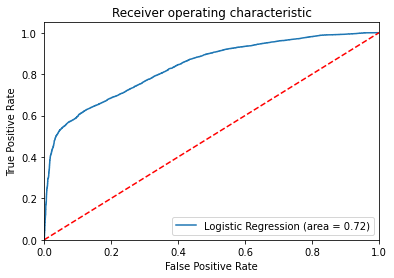

In [44]:
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()